### Done
* spacy lemmatisation don't remove proper names

### To Do
* train on more data??
* bigram trigram quad penta common phrases
* delete [music] and [laughter]

### Discussion and Findings

#### EDA
* Who is most popular? christian, dion, josh. no wait. deon? dionne? Use jpgs 
* Removed junk words 'think'

* Most laughter in patch [Music] [Laughter]
* you you you you you bad transcription
* each patch (document) should be about a few topics
* each document consists of a mixture of topics
* each topic consists of a collection of words
* minimum word length 3 or 4 for dictionary? 'they'
* alpha per document topic
* common acrosss all samples: social_convention, daily_habit (read from script), now before we get started??
* now before we get starteddion
* dion, dione, dionne, deon
* what_did_you_sew

### Method
* acquire subtitles - screenshots
* supply source code on github notsal


### How it can be used
* segments find sound_check which patch

In [1]:
import pandas as pd
import en_core_web_sm
import gensim
import gensim.corpora as corpora
import nltk
import spacy
import sklearn
import gzip
import json

from nltk.corpus import stopwords
from gensim.utils import simple_preprocess, simple_tokenize
from gensim.models import CoherenceModel
from gensim.models.phrases import Phraser
from pprint import pprint

# Plotting tools
import matplotlib.pyplot as plt
#get_ipython().run_line_magic('matplotlib', 'inline')

import warnings
warnings.filterwarnings('ignore')

nlp = spacy.load("en_core_web_sm")

In [41]:
# functions

# read in subtitles and remove YouTube's auto-generated audio descriptions
def read_and_clean(patch_number):
    path = 'C:/Users/Sally/WTP/data/'
    open_patch = open(path+f"Patch {patch_number}_ At Home with Patchwork _ YouTube Live Stream - English (auto.txt").read()
    clean_patch = open_patch.replace('\n\n',' ').replace('[Music] ','').replace('[Laughter] ','')
    return clean_patch

# turn the strings into words
def sent_to_words(your_list):
    for item in your_list:
        #yield(gensim.utils.simple_preprocess(str(item),deacc=False,min_len=3))
        yield(gensim.utils.simple_preprocess(str(item),deacc=False,min_len=0))
        

# read in subtitles and remove YouTube's auto-generated audio descriptions
def read_and_clean_alt(filename):
    path = 'C:/Users/Sally/WTP/data/'
    open_patch = open(path+f"{filename}.txt").read()
    clean_patch = open_patch.replace('\n\n',' ').replace('[Music] ','').replace('[Laughter] ','')
    return clean_patch

In [42]:
p64 = read_and_clean(64)
p65 = read_and_clean(65)
p66 = read_and_clean(66)
p67 = read_and_clean(67)
p68 = read_and_clean(68)
p69 = read_and_clean(69)

p01 = read_and_clean_alt('At Home with Patchwork')
p02 = read_and_clean_alt('At Home with Patchwork _ Sat 4th April - English (auto')

all_patches = [p01,p02,p64,p65,p66,p67,p68,p69]

for z in all_patches:
    print(len(z))

66003
69581
32038
30748
35566
43389
38486
58425


In [43]:
#uses simple_preprocess
data_words = list(sent_to_words(all_patches))

In [44]:
for p in data_words:
    print(len(p))

13818
14639
6716
6486
7507
9082
8097
12298


### Pre-processing

In [45]:
# Define functions for stopwords, bigrams, trigrams and lemmatization

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def make_quadgrams(texts):
    return [quadgram_mod[trigram_mod[doc]] for doc in texts]

In [46]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'PROPN']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def lemmatisation(texts):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc])
    return texts_out

In [47]:
stop_words = stopwords.words('english')
more_sw = ['go','know','think','get','want']
stop_words.append(more_sw)

In [48]:
# build the bigram and trigram models

bigram = gensim.models.Phrases(data_words)
trigram = gensim.models.Phrases(bigram[data_words])
quadgram = gensim.models.Phrases(trigram[data_words])

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
quadgram_mod = gensim.models.phrases.Phraser(quadgram)

In [49]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [50]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Form trigrams
data_words_trigrams = make_trigrams(data_words_nostops) # this is a list

# Form trigrams
data_words_quadgrams = make_quadgrams(data_words_nostops) # this is a list

In [51]:
%%time

data_lemmatised = lemmatisation(data_words_quadgrams)

Wall time: 2.76 s


In [52]:
#for i in quadgram.vocab.items():
#    print(i)

In [54]:
doc = 5
# print(all_patches[doc])
# print(data_words[doc])
# print(data_lemmatised[doc])
# print(data_words_nostops[doc])
# print(data_words_bigrams[doc])
# print(data_words_trigrams[doc])
print(data_words_quadgrams[doc])
# print('\n')

['hello', 'patchworkers', 'good', 'see', 'camera', 'good', 'see', 'christian', 'good', 'see', 'dion', 'christian', 'good', 'see', 'josh', 'okay', 'little', 'flush', 'bit', 'red', 'wine', 'sure', 'going', 'half', 'glass', 'feel_like', 'skin', 'cracking', 'oh', 'christian', 'sort', 'little', 'bit', 'uh', 'little', 'bit', 'horny', 'little', 'yeah', 'good', 'sign', 'christian', 'hoardy', 'skin', 'goes', 'dry', 'well', 'moisture', 'going', 'somewhere', 'else', 'guys', 'oh', 'god', 'cracking', 'must', 'ready', 'go', 'think', 'guys', 'make', 'episode', 'uh', 'good', 'never', 'described', 'flash', 'though', 'described', 'deck', 'cards', 'flush', 'never', 'uh', 'never', 'christian', 'flush', 'usually', 'relate', 'look', 'feel', 'well', 'probably', 'little', 'bit', 'feel', 'moment', 'look', 'flush', 'feel', 'shortly', 'success', 'well', 'uh', 'thank', 'everyone', 'uh', 'youtube_live', 'joining', 'us', 'today', 'get', 'cracking', 'episode', 'uh', 'shortly', 'um', 'bloody', 'cold', 'melbourne', 't

## Dictionary

In [55]:
id2word_raw = corpora.Dictionary(data_words)
id2word_raw.save_as_text('dictionary_raw.txt',sort_by_word=False)
print(len(id2word_raw))

id2word = corpora.Dictionary(data_lemmatised)
id2word.save_as_text('dictionary.txt',sort_by_word=False)
print(len(id2word))

5222
4199


In [92]:
d_word = [id2word[i] for i in id2word]
d_cf = [id2word.cfs[i] for i in id2word]
d_df = [id2word.dfs[i] for i in id2word]

dict = pd.DataFrame(zip(d_word,d_cf,d_df),columns=['word','count','patch'])
dict = dict[dict['count']>1]
dict = dict.sample(n=100,random_state=828)

In [118]:
import plotly.express as px
df = dict
#fig = px.scatter(df, x="count", y="patch", text="word", log_x=False, size_max=20, color="word",facet_col='patch')
fig = px.scatter(df
                 ,x="count"
                 ,y="patch"
                 ,text="word"
                 ,log_x=True
                 ,color='patch'
                 ,hover_name='word'
                 ,range_x = [1,1000]
                 ,range_y = [1,9]
                 ,animation_frame = 'count'
                )
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Patchword Vocab')
fig.update_layout(autosize=False,width=1200,height=500)
fig.show()

In [128]:
fig = px.histogram(df,             #dataframe
                   x = "count", #x-values column
                   nbins = 10,
                   )
fig.show()

In [465]:
dict

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,word,count,patch
0,able,15,6
1,absolutely,28,6
2,actually,49,6
3,adams,1,1
4,afraid,2,2
...,...,...,...
3204,wording,1,1
3205,yell,1,1
3206,yesterday,1,1
3207,younger,1,1


In [464]:
import plotly.express as px

df = dict
fig = px.sunburst(df, path=['patch'], values='count',color='count',hover_data=['word'])
fig.show()

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [462]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/718417069ead87650b90472464c7565dc8c2cb1c/coffee-flavors.csv')

fig = go.Figure()

fig.add_trace(go.Sunburst(
    ids=df.ids,
    labels=df.labels,
    parents=df.parents,
    maxdepth=2,
    insidetextorientation='radial'))

fig.show()

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [416]:
import matplotlib.pyplot as plt
x = dict['count']
y = dict['patch']
w = ['dfs','sdf','dsffdsdfs']
#w = dict['word']
#w = dict['word'].to_list()

ax.set_title('words')
ax.set_xlabel('occurences')
ax.set_ylabel('in patches')

#for i, txt in enumerate(w):
#    ax.annotate(txt,x[i], y[i])

plt.figure(figsize=(20,5))
plt.text(x+.03, y+.03, w, fontsize=9)

plt.scatter(x, y, c ="blue") 

plt.show()

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: cannot convert the series to <class 'float'>

<Figure size 1440x360 with 1 Axes>

In [406]:
import matplotlib.pyplot as plt
x = dict['count']
y = dict['patch']
#w = dict['word']
w = dict['word'].to_list()

ax.set_title('words')
ax.set_xlabel('occurences')
ax.set_ylabel('in patches')

for i, txt in enumerate(w):
    ax.annotate(txt,x[i], y[i])

plt.figure(figsize=(20,5))

plt.scatter(x, y, c ="blue") 

plt.show()

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: 0

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


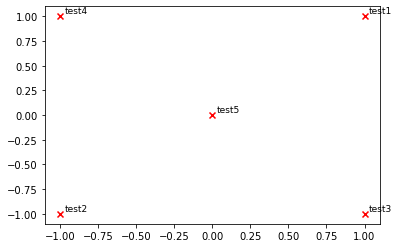

In [409]:
import numpy as np
def plot_embeddings(M_reduced, word2Ind, words):
    """ 
        Plot in a scatterplot the embeddings of the words specified in the list "words".
        Include a label next to each point.
    """
    for word in words:
        x, y = M_reduced[word2Ind[word]]
        plt.scatter(x, y, marker='x', color='red')
        plt.text(x+.03, y+.03, word, fontsize=9)
    plt.show()

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2Ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


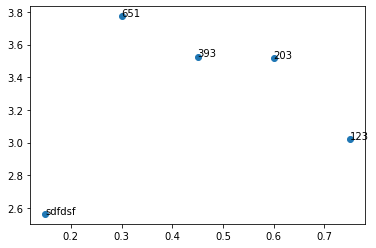

In [376]:
y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
z = [0.15, 0.3, 0.45, 0.6, 0.75]
n = ['sdfdsf', 651, 393, 203, 123]

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [340]:
w = dict['word']

for i, txt in enumerate(w):
    print(str(txt))

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


able
absolutely
actually
adams
afraid
afterwards
ago
agreeance
ahead
already
alright
also
alternative
always
amazing
amount
ankle
anna
another
ant
anxiety
anxious
anything
apart
apartment
apologetic
app
apparently
apprehensive
area
around
aside
ask
assassination
audit
australian
aware
away
baby
back
back_seat
backseat
bad
bag
bak
ball
banter
bark
barrel
base
basically
basis
beak
beautiful
become
bed
bedroom
begin
believe
belong
belt
ben
beneath
best
big
bike
birthday
bit
black
blanket
bloody
blow
body
boil
bola
bond
bone_pick
boot
bottle
bottom
bowl
box
boy
break
breakfast
bring
broad
broaden
buck
buddhist
buddy
build
bullet
bum
bush
business
businessman
busta
butter
buy
buying
cafe
calculate
calculation
calendar
call
cam
camera
camping
can
canvass
capella
car
care
careful
carry
case
cereal
certain
certainly
change
channel
character
chat
check
checkout
chickadee
chicken
choose
christian
christian_goodbye
christians
circular
city
clash
classic
clear
clock
closer_look
clothe
club
cluck
c

fear
feed
field
film
filthy
first_one
fishing
fitting
flat
flatmates
flexible
flight
flooring
flyer
fold
folk
forth
fran
freezer
freezing
french
freon
freshly_cut
frighten
fringe
frost
frostbite
fucked
fucking
fussy
future
gain
garage
gas
geez
gene
genevieve
genius
gin
giveaway
globe
glory
goal
goodness
graffiti
grandfather
grandparent
grater
groom
grown
grubby
grunt
guarantee
gutentag
haircut
hallowed
hannah
hardcopy
hardwood
hardwood_floor
heap
hearse
heart
heating
hen
hickety
hone
horizontally
however
hub
hug
inbox
incentive
inch
industry
inflexible
inherent
ink
inspiration
inspire
interior
internation
intervene
invest
irrigation
itchy
jasmine
jesus
jingle
joshua
joy
jud
jules
kite
knee
kopp
kylie
largely
laura
lazily
leasing
lense
lettering
lifting
likewise
limit
linen
linoleum
looking
loudly
luck
magenta
maintain
maintenance
manchester
manufacture
marvel
mattress
maximize
mayo
mcg
meaning
medication
memento
memory
merino
metro
metropolitan
milky
molt
mother
motivation
mouse
mug
mu

In [334]:
w

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0             able
1       absolutely
2         actually
3            adams
4           afraid
           ...    
3201       wording
3202          yell
3203     yesterday
3204       younger
3205          zine
Name: word, Length: 3206, dtype: object

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


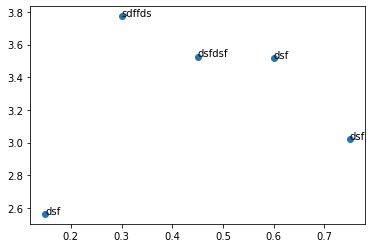

In [338]:
y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
z = [0.15, 0.3, 0.45, 0.6, 0.75]
n = ['dsf','sdffds','dsfdsf','dsf','dsf']

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [302]:
everything.to_csv('everything.csv')

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [241]:
# The word butter is mentioned 9 times across 4 patches ??????

for i in range(1,3000,100):
    print('The word',id2word[i],'is mentioned',id2word.cfs[i],'times across',id2word.dfs[i],'patches')

The word absolutely is mentioned 28 times across 6 patches
The word cafe is mentioned 13 times across 3 patches
The word deon is mentioned 6 times across 3 patches
The word five is mentioned 12 times across 5 patches
The word insulate is mentioned 1 times across 1 patches
The word messy is mentioned 3 times across 2 patches
The word piece is mentioned 7 times across 4 patches
The word selfish is mentioned 1 times across 1 patches
The word tack is mentioned 1 times across 1 patches
The word whereas is mentioned 3 times across 2 patches
The word bump_bump is mentioned 9 times across 3 patches
The word fig is mentioned 1 times across 1 patches
The word lolli is mentioned 1 times across 1 patches
The word quad is mentioned 4 times across 1 patches
The word success is mentioned 2 times across 2 patches
The word best_the is mentioned 2 times across 2 patches
The word famous is mentioned 2 times across 2 patches
The word mount is mentioned 1 times across 1 patches
The word slowly is mentioned

In [287]:
type(id2word)

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gensim.corpora.dictionary.Dictionary

In [288]:
id2word.cfs

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{892: 13,
 583: 57,
 210: 1,
 867: 1,
 447: 60,
 801: 57,
 406: 4,
 625: 1,
 792: 3,
 469: 1,
 578: 5,
 280: 21,
 895: 13,
 225: 4,
 418: 200,
 923: 347,
 590: 14,
 913: 48,
 883: 58,
 493: 54,
 452: 590,
 743: 1,
 682: 1,
 22: 14,
 335: 294,
 832: 127,
 435: 1,
 561: 2,
 815: 178,
 53: 10,
 894: 145,
 331: 451,
 510: 21,
 874: 29,
 884: 38,
 75: 3,
 860: 2,
 516: 21,
 265: 35,
 695: 113,
 167: 4,
 468: 81,
 79: 4,
 443: 2,
 200: 5,
 576: 7,
 616: 28,
 385: 2,
 372: 7,
 450: 26,
 879: 7,
 873: 2,
 535: 35,
 205: 22,
 142: 11,
 668: 160,
 416: 20,
 410: 17,
 294: 1,
 39: 83,
 151: 2,
 315: 6,
 769: 4,
 864: 1,
 256: 1,
 849: 57,
 593: 6,
 378: 1,
 129: 164,
 227: 20,
 336: 21,
 828: 99,
 771: 1,
 476: 89,
 97: 1,
 207: 12,
 541: 18,
 460: 62,
 206: 1,
 267: 1,
 528: 13,
 685: 163,
 78: 5,
 122: 6,
 17: 1,
 514: 3,
 519: 2,
 228: 2,
 757: 35,
 199: 4,
 408: 8,
 411: 16,
 663: 10,
 903: 16,
 701: 13,
 171: 4,
 13: 48,
 492: 30,
 105: 31,
 196: 4,
 235: 5,
 861: 3,
 208: 68,
 878: 162,
 29

In [242]:
patch_dict = pd.read_csv('dictionary.txt',names=['id','word','freq'],sep='\s+')

In [243]:
patch_dict.sort_values(by='freq',ascending=False).head(5)

,id,word,freq
1,365,hello,6.0
139,18,another,6.0
128,6,ago,6.0
129,838,together,6.0
130,664,rest,6.0


In [244]:
popular_words = patch_dict[patch_dict.freq < 2]
popular_words.head(5)

,id,word,freq
1270,210,disaster,1.0
1271,870,vain,1.0
1272,627,provider,1.0
1273,471,loop,1.0
1274,745,smooth,1.0


In [245]:
print(id2word)

Dictionary(3209 unique tokens: ['able', 'absolutely', 'actually', 'adams', 'afraid']...)


### Removing rubbish from corpus

In [246]:
print([k for k,v in id2word.items() if v=='know'])
print([k for k,v in id2word.items() if v=='think'])
print([k for k,v in id2word.items() if v=='hello'])

[433]
[818]
[365]


In [247]:
del_ids = 433,818,365

In [248]:
# remove unwanted word ids from the dictionary in place
id2word.filter_tokens(bad_ids=del_ids)

In [249]:
len(id2word)

3206

In [250]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_lemmatised]

## Topic Modelling

In [251]:
import os
mallet_path = "C:/Users/Sally/WTP/mallet-2.0.8/bin/mallet"
os.environ['MALLET_HOME'] = 'C:/Users/Sally/WTP/mallet-2.0.8'

In [266]:
num_topics = 20
num_words = 8

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path
                                            ,corpus=corpus
                                            ,num_topics=num_topics
                                            ,id2word=id2word
                                             )
pprint(ldamallet.show_topics(num_topics,num_words,formatted=False))

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('big', 0.04929577464788732),
   ('sort', 0.04812206572769953),
   ('leave', 0.04460093896713615),
   ('start', 0.04107981220657277),
   ('lot', 0.03873239436619718),
   ('stuff', 0.036384976525821594),
   ('house', 0.03286384976525822),
   ('pretty', 0.03286384976525822)]),
 (1,
  [('stranger', 0.0457516339869281),
   ('umbrella', 0.034858387799564274),
   ('josh', 0.030501089324618737),
   ('driver', 0.02832244008714597),
   ('cafe', 0.02832244008714597),
   ('sit', 0.023965141612200435),
   ('supply', 0.02178649237472767),
   ('menu', 0.0196078431372549)]),
 (2,
  [('order', 0.07282913165266107),
   ('kind', 0.047619047619047616),
   ('italian', 0.04481792717086835),
   ('make', 0.03361344537815126),
   ('man', 0.03361344537815126),
   ('feel_like', 0.028011204481792718),
   ('restaurant', 0.028011204481792718),
   ('bread', 0.022408963585434174)]),
 (3,
  [('friend', 0.09327548806941431),
   ('person', 0.07592190889370933),
   ('game', 0.039045553145336226),
   ('conversati

In [272]:
def explore_topic(topic_number, topn=25):        
    print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
    for term, frequency in ldamallet.show_topic(topic_number, topn=25):
        print(term,frequency)

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [274]:
explore_topic(topic_number=1)

term                 frequency

stranger 0.0457516339869281
umbrella 0.034858387799564274
josh 0.030501089324618737
driver 0.02832244008714597
cafe 0.02832244008714597
sit 0.023965141612200435
supply 0.02178649237472767
menu 0.0196078431372549
front_seat 0.017429193899782137
interesting 0.017429193899782137
dish 0.017429193899782137
dollar 0.017429193899782137
toast 0.015250544662309368
year_supply 0.015250544662309368
olive 0.015250544662309368
pizza 0.015250544662309368
cat 0.015250544662309368
tic_tacs 0.015250544662309368
serve 0.013071895424836602
honey 0.013071895424836602
group 0.010893246187363835
order 0.010893246187363835
shape 0.010893246187363835
rain 0.010893246187363835
bump_bump 0.010893246187363835


c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [284]:
wtf = gensim.models.ldamodel.LdaModel(corpus=corpus
                                            ,id2word=id2word
                                            ,num_topics=num_topics
                                            #,random_state=100
                                            #update_every=1,
                                            #chunksize=10,
                                            ,passes=20
                                            #alpha='symmetric',                                            
                                            ,alpha=0.05
                                            #iterations=30,
                                            #per_word_topics=False
                                     )
#wtf.show_topics(num_topics,num_words,formatted=False)

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [285]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(ldamallet, corpus,dictionary=id2word)
vis = pyLDAvis.gensim.prepare(lda_model, corpus,dictionary=id2word)
vis

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.012746 -0.001919       1        1  94.836233
12    -0.001923  0.004703       2        1   2.980252
7      0.000656  0.005356       3        1   1.297261
13    -0.002980  0.000045       4        1   0.844171
5     -0.000751  0.001243       5        1   0.021283
0     -0.002723 -0.000501       6        1   0.002080
14    -0.002784 -0.000166       7        1   0.002080
6      0.000791  0.006713       8        1   0.002080
1     -0.000848  0.000941       9        1   0.002080
2     -0.002028 -0.008557      10        1   0.002080
3      0.000819 -0.001254      11        1   0.002080
8     -0.000559 -0.002279      12        1   0.002080
4      0.003733 -0.000479      13        1   0.002080
11     0.010872  0.000674      14        1   0.002080
9      0.010469 -0.004521      15        1   0.002080, topic_info=          Term        Freq       Total Category  logprob  loglift
452       like  700.000000  700.000000  Default  30.0000  30.0000
331        get  480.000000  480.000000  Default  29.0000  29.0000
923       yeah  384.000000  384.000000  Default  28.0000  28.0000
335         go  277.000000  277.000000  Default  27.0000  27.0000
418       josh  206.000000  206.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
129  christian    0.001691  162.916937  Topic15  -5.4701  -0.6952
476       make    0.001198   82.998286  Topic15  -5.8149  -0.3656
752  something    0.001214  113.059716  Topic15  -5.8015  -0.6613
427       kind    0.001067   78.558307  Topic15  -5.9302  -0.4259
589     people    0.001088  101.536247  Topic15  -5.9109  -0.6632

[1241 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1869      1  1.159850  accurately
1873      1  0.662810      afford
1874      1  0.767601        alex
13        1  0.959358      always
13        2  0.019987      always
...     ...       ...         ...
923       4  0.007799        yeah
2680      1  0.887338      yearly
926       1  0.952242         yes
926       2  0.023225         yes
3205      1  0.890663        zine

[644 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 13, 8, 14, 6, 1, 15, 7, 2, 3, 4, 9, 5, 12, 10])

In [258]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatised, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ',coherence_lda)

c:\users\sally\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.23558925484608992


### bigrams and trigrams

In [149]:
from gensim.models import word2vec, Phrases
documents = all_patches
sentence_stream = [doc.split(" ") for doc in documents]

bigram = Phrases(sentence_stream, min_count=1000, threshold=20,delimiter=b' ')

INFO:gensim.models.phrases:collecting all words and their counts
INFO:gensim.models.phrases:PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO:gensim.models.phrases:collected 28973 word types from a corpus of 47340 words (unigram + bigrams) and 6 sentences
INFO:gensim.models.phrases:using 28973 counts as vocab in Phrases<0 vocab, min_count=1000, threshold=20, max_vocab_size=40000000>


In [150]:
for j in bigram.vocab.items():        
    print(j)

(b'you', 1368)
(b'hello', 18)
(b'you hello', 2)
(b'and', 1061)
(b'hello and', 1)
(b'welcome', 33)
(b'and welcome', 2)
(b'to', 1088)
(b'welcome to', 31)
(b'patch', 60)
(b'to patch', 5)
(b'64', 2)
(b'patch 64', 1)
(b'what', 436)
(b'64 what', 1)
(b'a', 1391)
(b'what a', 10)
(b'disaster', 1)
(b'a disaster', 1)
(b"it's", 613)
(b"disaster it's", 1)
(b'vain', 1)
(b"it's vain", 1)
(b"let's", 46)
(b"vain let's", 1)
(b"let's let's", 3)
(b'talk', 22)
(b"let's talk", 3)
(b'about', 235)
(b'talk about', 16)
(b'internet', 3)
(b'about internet', 1)
(b'providers', 1)
(b'internet providers', 1)
(b'providers and', 1)
(b'super', 3)
(b'and super', 1)
(b'loop', 1)
(b'super loop', 1)
(b'in', 551)
(b'loop in', 1)
(b'particular', 5)
(b'in particular', 1)
(b"that's", 252)
(b"particular that's", 1)
(b'not', 201)
(b"that's not", 12)
(b'it', 825)
(b'not it', 1)
(b'is', 530)
(b'it is', 41)
(b"is let's", 2)
(b'D', 4)
(b'about D', 1)
(b'on', 392)
(b'D on', 2)
(b'the', 1716)
(b'on the', 84)
(b'fact', 20)
(b'the fact',

(b'order', 17)
(b'is order', 1)
(b'order of', 2)
(b'operations', 2)
(b'of operations', 2)
(b'operations I', 1)
(b'I need', 4)
(b'get that', 7)
(b'that order', 1)
(b'operations right', 1)
(b'right in', 2)
(b'the most', 19)
(b'most efficient', 1)
(b'efficient way', 1)
(b'way possible', 1)
(b'possible and', 1)
(b'and my', 7)
(b'favorite', 32)
(b'my favorite', 15)
(b'favorite and', 2)
(b"and I've", 7)
(b'killed', 1)
(b"I've killed", 1)
(b'killed a', 1)
(b'of time', 2)
(b'time thinking', 2)
(b'about this', 13)
(b'is in', 6)
(b'breakfast', 7)
(b'the breakfast', 1)
(b'routine', 3)
(b'breakfast routine', 1)
(b'between', 10)
(b'routine between', 1)
(b'cereal', 2)
(b'between cereal', 1)
(b'milk', 7)
(b'cereal milk', 1)
(b'Bowl', 2)
(b'milk Bowl', 1)
(b'toast', 8)
(b'Bowl toast', 1)
(b'fridge', 48)
(b'toast fridge', 1)
(b'fridge those', 1)
(b'those kind', 2)
(b'of things', 6)
(b'things so', 2)
(b"I'm thinking", 1)
(b'thinking right', 1)
(b"right I'm", 2)
(b"I'm like", 5)
(b'like okay', 1)
(b'so m

(b'wings beneath', 1)
(b'L', 2)
(b'beneath L', 1)
(b'L we', 1)
(b'we say', 1)
(b'say the', 4)
(b'bola', 1)
(b'the bola', 1)
(b'proverbial', 1)
(b'bola proverbial', 1)
(b'proverbial wing', 1)
(b'guns', 1)
(b'wing guns', 1)
(b'guns and', 1)
(b'yeah we', 5)
(b'love you', 2)
(b'you we', 2)
(b'this all', 5)
(b'all for', 1)
(b'free and', 2)
(b'and patrons', 1)
(b'patrons is', 1)
(b'can sort', 2)
(b'sustain', 1)
(b'of sustain', 1)
(b'sustain this', 1)
(b'this so', 3)
(b'patreon.com', 4)
(b'a patreon.com', 1)
(b'patreon.com forward', 2)
(b'bak', 1)
(b'slash bak', 1)
(b'bak and', 1)
(b'patchwork do', 1)
(b'it now', 5)
(b"now it's", 12)
(b'lovely', 13)
(b'a lovely', 3)
(b'lovely thing', 1)
(b'thing to', 4)
(b'but as', 6)
(b'do every', 7)
(b'every week', 7)
(b'week we', 9)
(b'we sew', 2)
(b'patch into', 8)
(b'into our', 9)
(b'quilt', 8)
(b'our quilt', 4)
(b'quilt of', 3)
(b'of friendship', 4)
(b'friendship Josh', 4)
(b'Josh what', 5)
(b'what patch', 11)
(b'patch did', 12)
(b'did you', 42)
(b'you 

(b'or five', 1)
(b'five steps', 1)
(b'steps it', 1)
(b'goes I', 1)
(b'I gotta', 1)
(b'make the', 2)
(b'he comes', 1)
(b'comes back', 1)
(b'and answer', 1)
(b'answer like', 1)
(b'like two', 1)
(b'two or', 2)
(b'or three', 2)
(b'three more', 1)
(b'more just', 3)
(b'just like', 13)
(b'just load', 1)
(b'sir', 3)
(b'yes sir', 1)
(b'sir so', 1)
(b'reckon Josh', 1)
(b'to ask', 12)
(b'ask you', 12)
(b'ask for', 2)
(b'mint or', 1)
(b'just take', 3)
(b'offer', 2)
(b'off offer', 1)
(b'offer of', 1)
(b'desk you', 1)
(b'could just', 3)
(b'take absolutely', 1)
(b'absolutely just', 1)
(b'just taking', 1)
(b'taking what', 1)
(b'Chris', 1)
(b'what Chris', 1)
(b"Chris you're", 1)
(b"you're asking", 1)
(b'asking I', 1)
(b'my boy', 1)
(b'boy I', 1)
(b'I understand', 1)
(b"understand it's", 1)
(b'assumed', 1)
(b"it's assumed", 1)
(b'assumed that', 1)
(b'you still', 3)
(b'still need', 1)
(b'ask no', 1)
(b"don't reckon", 1)
(b'reckon you', 4)
(b"that's just", 4)
(b"just it's", 5)
(b'overkill', 2)
(b'just ove

(b'recreating what', 1)
(b"what i've", 3)
(b'got set', 1)
(b'up here', 1)
(b'i want', 4)
(b'see the', 3)
(b'enjoyment', 1)
(b'the enjoyment', 1)
(b'enjoyment across', 1)
(b'across your', 1)
(b'face all', 1)
(b'right okay', 1)
(b'that yeah', 3)
(b'yeah uh', 2)
(b'uh now', 2)
(b'now here', 1)
(b'here at', 1)
(b'patchwork every', 1)
(b'every now', 2)
(b'and again', 2)
(b'again we', 1)
(b'help', 7)
(b'uh help', 1)
(b'help you', 3)
(b'learn', 4)
(b'guys learn', 1)
(b'learn something', 1)
(b'increase', 2)
(b'and increase', 1)
(b'increase your', 1)
(b'vocabulary', 1)
(b'your vocabulary', 1)
(b'vocabulary so', 1)
(b'patchword', 1)
(b'for patchword', 1)
(b'patchword of', 1)
(b'day christian', 1)
(b'christian the', 3)
(b'the policeman', 1)
(b'policeman started', 1)
(b'started to', 1)
(b'become anxious', 1)
(b'anxious what', 1)
(b'originally', 1)
(b'was originally', 1)
(b'originally one', 1)
(b'member', 1)
(b'one member', 1)
(b'member of', 1)
(b'kukaracha', 1)
(b'the kukaracha', 1)
(b'motorcycle'

(b"i've had", 2)
(b'of red', 1)
(b'wine', 3)
(b'red wine', 1)
(b'wine and', 2)
(b'not sure', 3)
(b"sure what's", 1)
(b"on i've", 1)
(b'had half', 1)
(b'half a', 1)
(b'glass and', 1)
(b'like my', 2)
(b"skin's", 1)
(b"my skin's", 1)
(b'cracking', 3)
(b"skin's cracking", 1)
(b'cracking oh', 1)
(b'oh christian', 1)
(b'christian are', 3)
(b'bit uh', 2)
(b'uh a', 3)
(b'horny', 1)
(b'bit horny', 1)
(b'horny after', 1)
(b'after having', 1)
(b'little yeah', 1)
(b'good sign', 1)
(b"sign christian's", 1)
(b'hoardy', 1)
(b"christian's hoardy", 1)
(b'hoardy his', 1)
(b'his skin', 1)
(b'skin goes', 1)
(b'dry', 9)
(b'goes dry', 1)
(b'dry well', 1)
(b"moisture's", 1)
(b"the moisture's", 1)
(b"moisture's going", 1)
(b'going somewhere', 1)
(b'somewhere else', 1)
(b'else guys', 1)
(b'guys oh', 1)
(b"god he's", 1)
(b"he's cracking", 1)
(b'cracking he', 1)
(b'he must', 1)
(b'be ready', 1)
(b'ready to', 1)
(b'think now', 1)
(b'now these', 1)
(b'episode uh', 2)
(b"i'm good", 1)
(b"good i've", 1)
(b"i've neve

(b"it's hit", 1)
(b'hit eight', 1)
(b"o'clock you", 1)
(b'just sort', 2)
(b'of hanging', 1)
(b'hanging around', 1)
(b'around doing', 1)
(b'doing nothing', 1)
(b'nothing yeah', 1)
(b'unlock', 1)
(b'you unlock', 1)
(b'unlock the', 1)
(b"it's shocking", 1)
(b"shocking isn't", 1)
(b"you're ready", 1)
(b'do anything', 1)
(b"can't start", 1)
(b'start something', 1)
(b'else because', 1)
(b'mood has', 1)
(b'has settled', 1)
(b'settled and', 1)
(b"it's getting", 1)
(b'getting stale', 1)
(b'stale yeah', 1)
(b'ever leave', 1)
(b'unlocked', 1)
(b'door unlocked', 1)
(b'unlocked so', 1)
(b'just walk', 1)
(b'walk in', 1)
(b'knock', 2)
(b'they knock', 1)
(b'knock you', 1)
(b'like come', 1)
(b'seem really', 1)
(b'relaxed', 1)
(b'really relaxed', 1)
(b'relaxed why', 1)
(b'there come', 1)
(b'on babe', 1)
(b'babe come', 1)
(b'in well', 1)
(b'thing yeah', 2)
(b'nonchalantly', 1)
(b'be nonchalantly', 1)
(b'nonchalantly just', 1)
(b'just yeah', 1)
(b'uh yeah', 3)
(b'derivative', 1)
(b'a derivative', 1)
(b'de

(b'your boy', 1)
(b'boy did', 1)
(b"did you're", 1)
(b'be spending', 1)
(b'spending the', 1)
(b'entire night', 1)
(b'night most', 1)
(b'most likely', 1)
(b'likely with', 1)
(b'person why', 1)
(b'why not', 2)
(b'not show', 1)
(b'show a', 1)
(b'respect', 3)
(b'of respect', 1)
(b'respect to', 1)
(b'driving', 4)
(b"who's driving", 1)
(b'driving you', 1)
(b'destination', 1)
(b'the destination', 1)
(b'destination no', 1)
(b'the 15', 1)
(b"minutes you're", 1)
(b'car how', 1)
(b'how how', 1)
(b"about I've", 1)
(b'spend a', 1)
(b'whole the', 1)
(b'the diet', 1)
(b'diet with', 1)
(b'that friend', 1)
(b"friend can't", 1)
(b"can't wait", 1)
(b'wait to', 1)
(b'catch', 4)
(b'to catch', 2)
(b'catch up', 1)
(b'up them', 1)
(b'talk to', 5)
(b'who I', 1)
(b'have nothing', 1)
(b'nothing in', 1)
(b'in common', 1)
(b"common that's", 1)
(b'avoiding', 1)
(b"that's avoiding", 1)
(b'avoiding Christians', 1)
(b'Christians question', 1)
(b'question how', 2)
(b'driver just', 1)
(b'by paying', 1)
(b'paying him', 1

(b'with really', 1)
(b'Goods and', 2)
(b'also of', 1)
(b'course our', 1)
(b'our patches', 1)
(b'patches so', 1)
(b'so see', 1)
(b'minutes from', 2)
(b'from now', 1)
(b'now yeah', 1)
(b'yeah yep', 1)
(b'yep really', 1)
(b'Xin', 1)
(b'good Xin', 1)
(b'Xin really', 1)
(b'good you', 1)
(b'the bump', 2)
(b'bump really', 2)
(b'brilliantly', 1)
(b'a brilliantly', 1)
(b'brilliantly bump', 1)
(b'bump look', 1)
(b"look we've", 1)
(b"we've always", 1)
(b'always loved', 1)
(b'loved hearing', 1)
(b'and because', 1)
(b"because we're", 2)
(b'live-streaming', 1)
(b"we're live-streaming", 1)
(b'live-streaming our', 1)
(b'episodes on', 1)
(b'live you', 1)
(b'submit', 1)
(b'can submit', 1)
(b'submit them', 1)
(b'them at', 2)
(b'big screen', 1)
(b'screen so', 1)
(b'so do', 2)
(b'Katie', 1)
(b'what Katie', 1)
(b'Halladay', 1)
(b'Katie Halladay', 1)
(b'Halladay thinks', 1)
(b'cool when', 1)
(b'shake', 1)
(b'you shake', 1)
(b'shake your', 1)
(b'duvet', 2)
(b'your duvet', 1)
(b'duvet into', 1)
(b'the duvet', 

(b'Jesus', 1)
(b'exclusively Jesus', 1)
(b'Jesus hot', 1)
(b'hot today', 1)
(b"today I'll", 1)
(b"I'll open", 1)
(b'aah', 1)
(b'fridge aah', 1)
(b'aah how', 1)
(b'how else', 1)
(b'get cold', 1)
(b'cold fridge', 1)
(b'fridge risk', 1)
(b'risk are', 1)
(b'are because', 1)
(b'will I', 1)
(b'really heavily', 1)
(b'heavily err', 1)
(b'fridge close', 1)
(b'close as', 1)
(b'feel guilty', 1)
(b'guilty when', 1)
(b'peek', 1)
(b'I peek', 1)
(b'peek in', 1)
(b'for too', 3)
(b'long if', 1)
(b'might looking', 1)
(b'some white', 1)
(b'white know', 1)
(b'a my', 1)
(b'understand is', 1)
(b'take such', 1)
(b'a firm', 1)
(b'firm line', 1)
(b'line on', 1)
(b'this without', 1)
(b'without having', 1)
(b'concern of', 1)
(b'being worried', 1)
(b'every other', 1)
(b'other part', 1)
(b'part in', 1)
(b'conserving', 1)
(b'not conserving', 1)
(b'conserving energy', 1)
(b'energy yeah', 1)
(b'better to', 1)
(b'take what', 1)
(b'get right', 1)
(b"that's if", 1)
(b'do to', 1)
(b'my green', 1)
(b'green step', 1)
(b'st

(b"I'm Josh", 1)
(b'Josh maybe', 1)
(b"I'll throw", 1)
(b'to sort', 3)
(b'of explain', 1)
(b'explain why', 1)
(b"why we've", 1)
(b"we've taken", 1)
(b'taken this', 1)
(b'this course', 1)
(b'course of', 1)
(b'action', 1)
(b'of action', 1)
(b'action yeah', 1)
(b"break it's", 1)
(b'just as', 1)
(b'sure a', 1)
(b'experiencing', 1)
(b'are experiencing', 1)
(b'experiencing here', 1)
(b'Australia', 1)
(b'in Australia', 1)
(b'Cove', 1)
(b'Australia Cove', 1)
(b"Cove it's", 1)
(b'been pretty', 1)
(b'pretty tough', 1)
(b'tough for', 1)
(b'me personally', 1)
(b"personally I've", 1)
(b'struggled', 1)
(b"I've struggled", 1)
(b'struggled a', 1)
(b'bit with', 1)
(b'supportive', 1)
(b'really supportive', 1)
(b'supportive and', 1)
(b'and helping', 1)
(b'me through', 1)
(b'difficult but', 1)
(b'struggling', 1)
(b'are struggling', 1)
(b'struggling make', 1)
(b'you reach', 1)
(b'reach out', 1)
(b'break just', 1)
(b'a hold', 1)
(b'everything again', 1)
(b'love doing', 1)
(b'and really', 1)
(b'producing', 1

In [163]:
trigram_sentences_project = []
documents = p69
sentence_stream = [doc.split(" ") for doc in documents]

bigram = Phrases(sentence_stream, min_count=25, delimiter=b' ')
trigram = Phrases(bigram[sentence_stream], min_count=10, delimiter=b' ')

for sent in sentence_stream:
    #bigrams_ = [b for b in bigram[sent] if b.count(' ') == 1]
    #trigrams_ = [t for t in trigram[bigram[sent]] if t.count(' ') == 2]
    bigrams_ = bigram[sent]
    trigrams_ = trigram[bigram[sent]]
    trigram_sentences_project.append(trigrams_)

INFO:gensim.models.phrases:collecting all words and their counts
INFO:gensim.models.phrases:PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO:gensim.models.phrases:PROGRESS: at sentence #10000, processed 12019 words and 49 word types
INFO:gensim.models.phrases:PROGRESS: at sentence #20000, processed 24018 words and 51 word types
INFO:gensim.models.phrases:PROGRESS: at sentence #30000, processed 35985 words and 61 word types
INFO:gensim.models.phrases:PROGRESS: at sentence #40000, processed 47976 words and 62 word types
INFO:gensim.models.phrases:PROGRESS: at sentence #50000, processed 59947 words and 62 word types
INFO:gensim.models.phrases:collected 63 word types from a corpus of 70019 words (unigram + bigrams) and 58425 sentences
INFO:gensim.models.phrases:using 63 counts as vocab in Phrases<0 vocab, min_count=25, threshold=10.0, max_vocab_size=40000000>
INFO:gensim.models.phrases:collecting all words and their counts
INFO:gensim.models.phrases:PROGRESS: at sentence #

In [93]:
patches = [patch.lower().split(" ") for patch in all_patches]

In [26]:
# https://stackoverflow.com/questions/46148182/issues-in-getting-trigrams-using-gensim/46153316

#5,2  picks up problem no problem

min_bi = 12
min_tri = 5

from gensim.models import Phrases

bigram = Phrases(patches, min_count=min_bi, delimiter=b' ',threshold=16)
trigram = Phrases(bigram[patches], min_count=min_tri, delimiter=b' ')

for sent in patches:
    bigrams_ = [b for b in bigram[sent] if b.count(' ') == 1]
    trigrams_ = [t for t in trigram[bigram[sent]] if t.count(' ') == 2]
    print(bigrams_)
    print(trigrams_)

INFO:gensim.models.phrases:collecting all words and their counts
INFO:gensim.models.phrases:PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO:gensim.models.phrases:collected 28531 word types from a corpus of 47340 words (unigram + bigrams) and 6 sentences
INFO:gensim.models.phrases:using 28531 counts as vocab in Phrases<0 vocab, min_count=12, threshold=16, max_vocab_size=40000000>
INFO:gensim.models.phrases:collecting all words and their counts
INFO:gensim.models.phrases:PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO:gensim.models.phrases:collected 28781 word types from a corpus of 46569 words (unigram + bigrams) and 6 sentences
INFO:gensim.models.phrases:using 28781 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


['talk about', 'talk about', 'talk about', "don't know", 'all right', "don't know", 'as well', 'all right', "we've got", "don't know", 'sort of', "don't know", 'kind of', "we've got", "we'll be", 'lot of', 'little bit', "we'll be", "i'm gonna", "i've got", 'kind of', 'little bit', 'make sure', 'kind of', 'little bit', 'little bit', "you've got", 'kind of', "i've got", 'as well', 'lot of', 'all right', 'sort of', 'talking about', 'kind of', 'as well', "don't know", 'kind of', 'kind of', "you've got", "you've got", "we've got", "we've got", "you've got", 'kind of', 'all right', 'kind of', "don't know", 'lot of', 'kind of', "i'm gonna", "i'm gonna", 'lot of', 'kind of', 'kind of', 'make sure', "don't know", "don't know", "you've got", 'lot of', 'lot of', 'talking about', "i've got", "don't know", "i'm gonna", "i'm gonna", "i'm gonna", 'make sure', 'all right', 'oh wow', 'talking about', 'talking about', "you've got", "i've got", "don't know", "don't know", 'kind of', 'talking about', 'tal

['really good', 'really good', 'talk about', "don't know", "don't know", 'big prize', 'big prize', 'big prize', 'big prize', 'big prize', "i'm gonna", 'as well', 'big prize', 'big prize', 'hang on', 'little bit', 'sort of', 'as well', "we'll be", "i've got", 'tea towel', 'tea towel', 'tea towel', 'tea towel', 'tea towel', 'tea towel', 'tea towel', 'little bit', 'tea towel', 'make sure', "don't know", 'tea towel', "don't know", 'tea towel', 'tea towel', 'tea towel', 'as well', "you've got", 'tea towel', 'tea towel', "don't know", 'tea towel', 'talking about', 'talking about', 'hang on', "don't know", "i've got", 'youtube live', "you've got", "i've got", "we've got", 'lot of', 'lot of', 'talk about', 'lot of', "i've been", 'as well', 'sort of', "you've got", "i'm gonna", "you've got", 'lot of', 'kind of', 'kind of', 'kind of', 'kind of', 'hang on', 'this week', "i'm gonna", 'as well', 'talking about', "don't know", "i'm gonna", "i'm gonna", "i'm gonna", "you've got", "you've got", "i'm g

In [345]:
#id2word.filter_extremes(no_below=1)
#id2word.save_as_text('dictionary_filtered_extremes.txt',sort_by_word=False)
#print(len(id2word))

#id2word.filter_extremes(no_below=1,no_above=0.9)
#id2word_clean = corpora.Dictionary(data_lemmatized).filter_extremes(no_below=5, no_above=0.5, keep_n=1)
#id2word_2 = corpora.Dictionary(data_lemmatised)